# Week 7 Homework

### 15th Annual Faculty Research Poster Session and Research Fair

I did not visit the 15th Annual Faculty Research Poster Session and Research Fair because I was hosting an SI session at that time.

### Script Modification For Team Project

I decided to find a way to extract the imbedded scripts that are in the html source code of the websites that my group is referencing. That way we can look at the scripts the author has created and figure out how they work in order to apply simialr logic to our own pacman game. I ended up taking this a step further, and I decided to find a way to extract any and all matches to any regex that we provide. That way we can look at CSS styling or even functions within the embedded scripts.

I modified my bash script to take two arguments:
- the path to the file that has a website on each line that we want to examine
- the regex to match

My script pulls the source code from each website one at a time, finds the text that matches the regex, and then saves the output to a file.

Here is my script:

In [ ]:
#!/usr/bin/env bash

# this is an if statement that will display a usage message
# if the user did not specify enough arguments on the command line
if [ $# -lt 2 ]; then
    printf "Not enough args provided. Need 2.\n"
    printf "USAGE:\n"
    printf "\tfindRegex.sh </path/to/file-with-websites> <regex>\n"
    exit 1
fi

websites="$1"   # path to file with list of websites to read from
i=1             # variable to differentiate output file names

while IFS= read -r site # this is a while loop that will read each line
do                      # from websites and store it into $site

    # display the website that is being checked
    printf "Checking for (?s)$2 in\n$site\n"

    # pull source code
    (curl -s "$site" |

    # find all the matches to the specified regex.
    # -z reads the input as a single line so that way we can
    #   find matches that span multiple lines.
    # -P allows grep to use complex regexs like:
    #   (?s)
    #   (?<=)
    # (?s) makes the '.' match any character including newline
    grep -ozP "(?s)$2" |

    # the previous grep command causes there to be some NULL (x00) characters
    # where there should be some newline characters. This sed command replaces
    # those NULL characters with the specified replacement
    sed "s/\x00/\n\n********************\n\n/g") > website-$i.txt # throw the output to a file

    # display where the output went
    printf "Saved to website-$i.txt\n\n"

    # increment i
    let "i += 1"

done < "$websites"

### Major Changes

First I removed the sort and uniq commands since they were not needed to get my desired output.

Next I had to adjust my grep options so that I could find matches that spanned multiple lines. The way grep works is that it only searches the line. For example, I wanted to find the opening and closing script tags, as well as everything in between. To do so, I used this regex: <script.*?/script>. However, there could be several lines in between the opening and closing script tags, so grep would not match them to the regex. To remedy this, I used -z which causes the input to be read as a single line. However, that alone is not enough to fix the issue, because that simply turns the newline character into a NULL character. I also had to prefix my regex with (?s). This causes the '.' to match any character at all, even newlines and NULLs.

After that I used the sed command to replace the NULL characters, which are represented as x00 in hex, with a string that helps separate the output. That way I can tell where the match starts and stops.

The output is then saved to a file so that I may go look at it.

### Running The Script

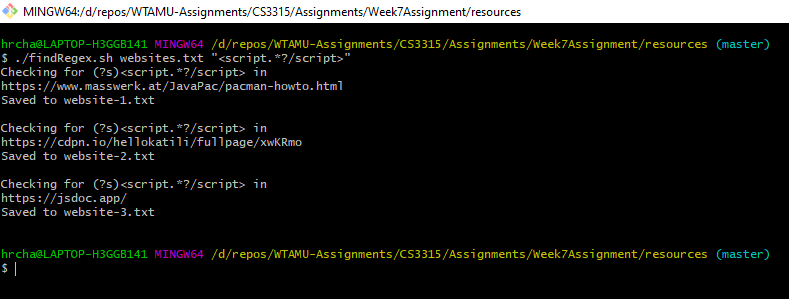

### Directory After Script Has Finished



### Website 2 Output



### Surveys

##### Monday
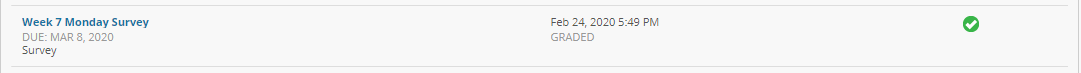

##### Wednesday
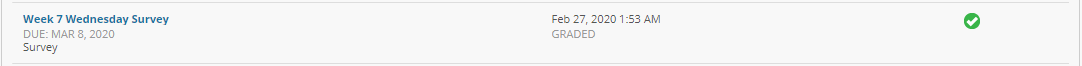

### Resources

- [Script](files/resources/findRegex.sh)
- [Websites](files/resources/websites.txt)